In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
df = pd.read_csv('C:\\Users\\T\\Downloads\\marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [149]:
df.columns = df.columns.str.replace(' ','')

In [150]:
df['Income'] = df['Income'].str.replace('$', '')

C:\Users\T\AppData\Local\Temp\ipykernel_35916\3892598115.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Income'] = df['Income'].str.replace('$', '')


In [151]:
df['Income'] = df['Income'].str.replace(',', '')

In [152]:
df['Income'] = df['Income'].astype('float')

In [153]:
df['Dt_Customer'] = pd.to_datetime( df['Dt_Customer'])
df.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [155]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [156]:
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [157]:
df['Income'].isnull().sum()

0

In [158]:
df.duplicated().sum()

0

In [159]:
df_to_remove_outliers = df.loc[:, ['Year_Birth','Income']]
df_to_remove_outliers.head(1)

,Year_Birth,Income
0,1970,84835.0


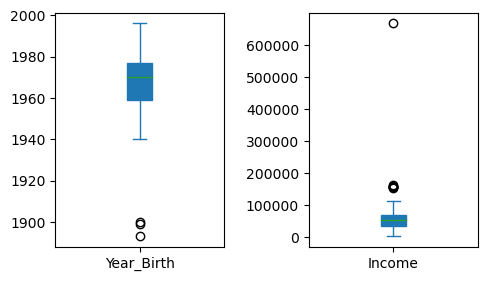

In [160]:
df_to_remove_outliers.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5)

In [162]:
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

In [164]:
df = df[df['Income'] < 250000].reset_index(drop=True)

In [166]:
df["Income"].max()

162397.0

In [167]:
df["Year_Birth"].min()

1940

In [168]:
# Total Amount Spent
mnt_cols = [col for col in df.columns if 'Mnt' in col]
df['Total_Mnt'] = df[mnt_cols].sum(axis = 1)

In [169]:
# Total Amount Purchases
Purchases_cols = [col for col in df.columns if 'Purchases' in col]
df['Total_Purchases'] = df[Purchases_cols].sum(axis = 1)

In [170]:
# Total Amount Cmp
Cmp_cols = [col for col in df.columns if 'Cmp' in col]
df['Total_Cmp'] = df[Cmp_cols].sum(axis = 1)

In [171]:
# Total Amount Productsq
Products_cols = [col for col in df.columns if 'Products' in col]
df['Total_Products'] = df[Products_cols].sum(axis = 1)

In [172]:
df[['ID', 'Total_Mnt', 'Total_Purchases', 'Total_Cmp', 'Total_Products']].head() 

,ID,Total_Mnt,Total_Purchases,Total_Cmp,Total_Products
0,1826,1190,15,0,679
1,1,577,18,1,71
2,10476,251,11,0,76
3,1386,11,4,0,1
4,5371,91,8,1,35


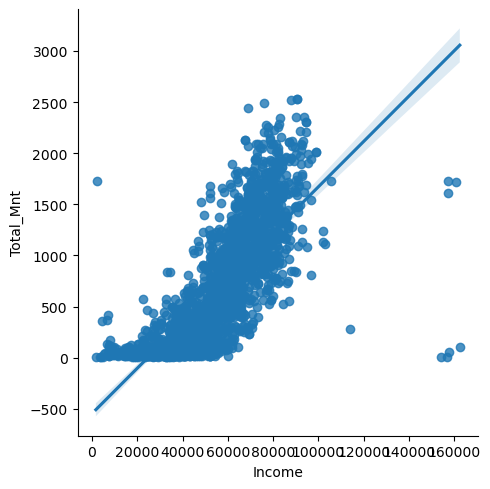

In [176]:
sns.lmplot(x ='Income', y = 'Total_Mnt', data = df)

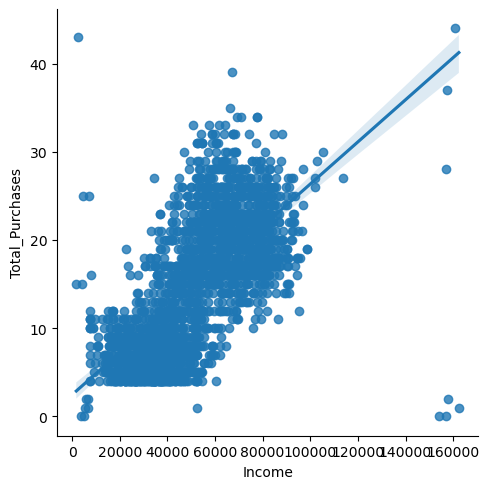

In [177]:
sns.lmplot(x ='Income', y = 'Total_Purchases', data = df)

In [178]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Mnt,Total_Purchases,Total_Cmp,Total_Products
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,1,0,SP,1190,15,0,679
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,1,1,0,CA,577,18,1,71
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,US,251,11,0,76
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,AUS,11,4,0,1
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,1,0,SP,91,8,1,35


In [180]:
df.to_csv('New_Market_Analysis')